# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.097263e+01     6.950423e+00
 * time: 0.004567146301269531
     1     2.706450e+01     4.585672e+00
 * time: 0.013404130935668945
     2     2.079582e+01     6.875315e+00
 * time: 0.03446507453918457
     3     1.253902e+01     1.894289e+00
 * time: 0.059689998626708984
     4     1.171246e+01     2.602495e+00
 * time: 0.07657408714294434
     5     1.156987e+01     2.085974e+00
 * time: 0.0934591293334961
     6     1.098795e+01     2.056987e+00
 * time: 0.11030912399291992
     7     1.026210e+01     1.499875e+00
 * time: 0.12716102600097656
     8     9.597315e+00     1.108887e+00
 * time: 0.14398503303527832
     9     9.210878e+00     6.769316e-01
 * time: 0.1609351634979248
    10     9.037069e+00     7.480029e-01
 * time: 0.1778721809387207
    11     8.926816e+00     4.657093e-01
 * time: 0.19479012489318848
    12     8.890114e+00     5.254442e-01
 * time: 0.20760011672973633
    13     8.849096e+00     3.309655e-01
 * time:

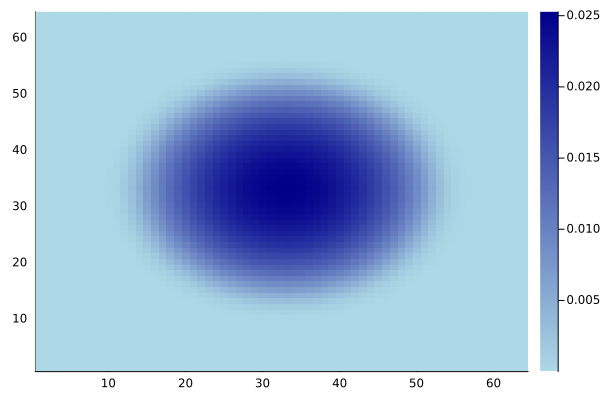

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)